<a href="https://colab.research.google.com/github/OmarK920/Data-Science-Projects/blob/main/Optimal_Polynomial_and_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Read Me**

In this project I used Polynomial regression and figured out the optimal degree that would fit the data best, moreover, i used two types of regularization Ridge and Lasso.finnaly i compared the outputs of each model with each other and chose the primal one to predicat a set of input features. 

**Imports**

**Reading Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
df = pd.read_csv("/content/Advertising.csv")

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Splitting The DataSet**

In [ ]:
X=df.drop('sales',axis=1)
y=df['sales']

**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=1)

**Linear Regression**

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Linear Regression model with crossval.

cv_linear = cross_val_score(estimator = lin_reg, X = X_train, y = y_train, cv = 9)

y_pred_linear_train = lin_reg.predict(X_train)#predicted of given x-train

y_pred_linear_test = lin_reg.predict(X_test)#predicted of given x-test

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print("RMSE: ", rmse_linear)

CV:  0.8807211752615711
RMSE:  1.404651423032895


**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
#Choose the optimal degree to use use in polynomial Regression

#we start by loopint through all the diffrent degrees from (1-10) and we check the RMSE and CV score for each degree of each degree 
#we found that the value of ( d = 3) produced the least (RMSE) error


Rmsescore = []

for i in range(1 ,11):
  poly_reg = PolynomialFeatures(degree = i)

  X_poly = poly_reg.fit_transform(X_train)
  poly_reg.fit(X_poly, y_train)
  regressor_poly2 = LinearRegression()
  regressor_poly2.fit(X_poly, y_train)


  cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 9)

  y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))

  y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))

  rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
  print('CV: ', cv_poly2.mean())
  print("RMSE: ", rmse_poly2)
  Rmsescore.append(rmse_poly2)


  models = [('Linear Regression', rmse_linear,  cv_linear.mean()),
            ('Polynomial Regression ', rmse_poly2, cv_poly2.mean()),
          ] 


  predict = pd.DataFrame(data = models, columns=['Model', 'RMSE','Cross-Validation'])
  predict



CV:  0.8807211752615711
RMSE:  1.404651423032896
CV:  0.8807211752615711
RMSE:  0.4936422529094082
CV:  0.8807211752615711
RMSE:  0.42296869532182146
CV:  0.8807211752615711
RMSE:  0.4737257847879722
CV:  0.8807211752615711
RMSE:  2.3373816938596823
CV:  0.8807211752615711
RMSE:  20.821516407705325
CV:  0.8807211752615711
RMSE:  207.61421308675025
CV:  0.8807211752615711
RMSE:  7667.084612392734
CV:  0.8807211752615711
RMSE:  139442.86281617757
CV:  0.8807211752615711
RMSE:  316046.7574165428


**Error Complexity plot**

In [ ]:
#Create a new dataframe 

complexity = [1 , 2 , 3 ,4 , 5 , 6 ,7 ,8 ,9 , 10]

RMSE  = pd.DataFrame({'Rmsescore':Rmsescore , 'complexity' : complexity})

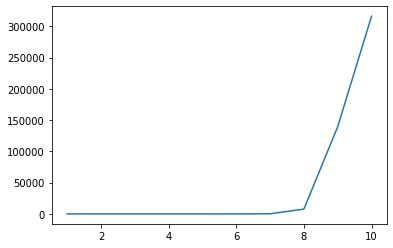

In [ ]:
plt.plot(RMSE['complexity'] ,RMSE['Rmsescore'])

**Comparing the Polynomial model with Linear Model**

In [ ]:
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [ ]:
models = [('Linear Regression', rmse_linear,  cv_linear.mean()),
          ('Polynomial Regression ', rmse_poly2, cv_poly2.mean()),
         ] 

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE','Cross-Validation'])
predict


,Model,RMSE,Cross-Validation
0,Linear Regression,1.404651,0.880721
1,Polynomial Regression,316046.757417,0.880721


**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
#Ridge crossval score and RMSE

ridgemodel = Ridge()
ridgemodel.fit(X_train,y_train)
ridgepredict = ridgemodel.predict(X_test)

cv_ridge = cross_val_score(estimator = ridgemodel, X = X_train, y = y_train, cv = 9)


rmse_ridge = (np.sqrt(mean_squared_error(y_test, ridgepredict)))
print("CV: ", cv_ridge.mean())
print("RMSE: ", rmse_ridge)



CV:  0.8807212759758308
RMSE:  1.404683615988586


**Compare Ridge and Polynomial Regression**

In [ ]:
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
RidgeModel = Ridge()
RidgeModel.fit(X_poly, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


Ridge()

In [ ]:
rmse_poly3 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))



In [ ]:
models = [('Ridge Regression', rmse_ridge,  cv_ridge.mean()),
          ('Polynomial Regression ', rmse_poly3, cv_poly2.mean()),
         ] 

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE','Cross-Validation'])
predict

,Model,RMSE,Cross-Validation
0,Ridge Regression,1.404684,0.880721
1,Polynomial Regression,316046.757417,0.880721


**Predicted sales**

In [ ]:
final_model = LinearRegression()
final_model.fit(X,y)
y_hat = final_model.predict(X)

In [ ]:
from joblib import dump, load
dump(final_model, 'sales_model.joblib') 


['sales_model.joblib']

In [ ]:
residuals = y_hat - y


In [ ]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
Sales_Prediction = [149 , 22 , 12]*final_model.coef_
print(sum(Sales_Prediction))


10.954142628545025


In [ ]:
loaded_model = load('sales_model.joblib')


In [ ]:
campaign = [[149,22,12]]
loaded_model.predict(campaign)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([13.893032])